The goal of this project is to classify different types of glass based on their chemical properties using the K-Nearest Neighbors (KNN) algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data =pd.read_csv('glass.csv')

In [3]:
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [7]:
X = data.drop('Type', axis=1)
y = data['Type']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

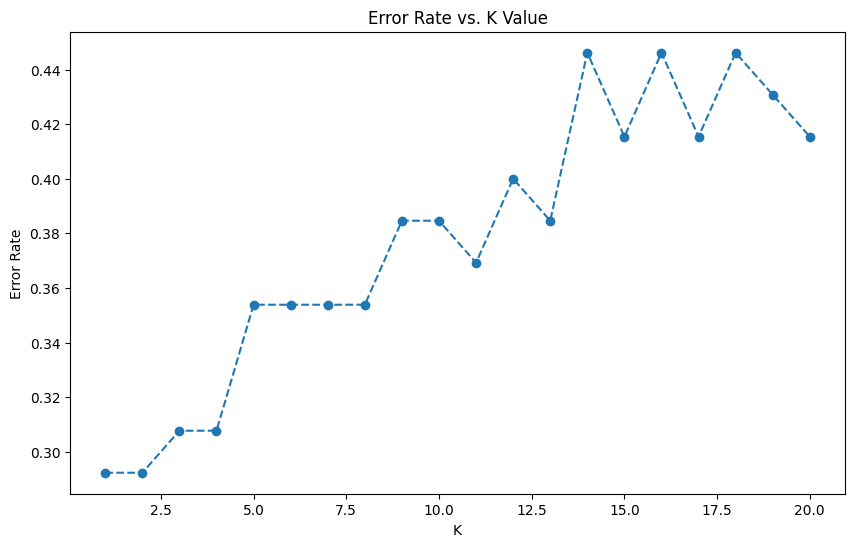

In [10]:
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [48]:

knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')  # Replace 5 with optimal K
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [49]:
y_pred = knn.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy

0.6923076923076923

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.81      0.71        21
           2       0.70      0.70      0.70        23
           3       1.00      0.20      0.33         5
           5       0.67      0.50      0.57         4
           6       0.67      0.67      0.67         3
           7       0.88      0.78      0.82         9

    accuracy                           0.69        65
   macro avg       0.76      0.61      0.63        65
weighted avg       0.72      0.69      0.68        65

